## Gather

In [2]:
import pandas as pd
import numpy as np
import requests 
import io
import os
import json
import re 
from timeit import default_timer as timer
from datetime import datetime

In [3]:
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
# Read Enhanced Twitter Archive Data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Get Image Predictions file from Udacity's servers 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Write contents to a file
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [6]:
# Read Image Predictions file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
# Create a list of tweet IDs from Twitter Archive file
tweet_id_list = twitter_archive.tweet_id.values

In [7]:
# Run query on Twitter API to get tweet status for each tweet

start = timer()
with open('tweet_json.txt', 'w') as outfile:  
    for tweet_id in tweet_id_list:
        try:        
            tweet_status=api.get_status(tweet_id, tweet_mode='extended')            
            json.dump(tweet_status._json, outfile)
            outfile.write('\n')
        except:
            print("Tweet does not exist")
            pass
end = timer()
print(end - start)


Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Tweet does not exist
Rate limit reached. Sleeping for: 492
Tweet does not exist
Tweet does not exist
Rate limit reached. Sleeping for: 737
1667.420713163


In [7]:
# Read tweets JSON file into pandas data frame
tweet_status = pd.read_json('tweet_json.txt',lines=True)

**Note:** Alternate method

```python
with open('tweet_json.txt') as f:
    tweet_status = pd.DataFrame(json.loads(line) for line in f)
```

## Assess

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [16]:
tweet_status

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37559,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8194,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32289,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6060,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24330,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4008,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40914,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8351,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39100,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9043,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19668,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3003,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11492,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1985,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",63396,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,18204,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27036,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4121,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",30987,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7115,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null bool
full_text                        2337 non-null object
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

#### Quality
##### `twitter_archive` table
- Nulls represented as 'None' in name, doggo, floofer, pupper amd puppo columns
- Some tweets are retweets 
- Some rating are dates such as 9/11 and 4/20
- Incorrect dog names such as 'a', 'an', 'such', 'the','quite'.
- Tweets that are not ratings
- Erroneous datatypes (tweet_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denomnator)


##### `image_predictions` table
- Erroneous datatypes (tweet_id)
- Predictions that are not dogs


##### `tweet_status` table
- Erroneous datatypes (id_str, in_reply_to_status_id_str, in_reply_to_user_id_str, quoted_status_id_str, favorite_count, retweet_count)

#### Tidiness
- Four columns (doggo, floofer, pupper, puppo) in `twitter_archive` table should be represented by one column (stage) 
- `image_predictions` table should be merged with `twitter_archive` table. There are 2356 tweets in `twitter_archive` table and 2075 image predictions in `image_predictions` . We only want tweets with images.
- favorite_count and retweet_count should be merged into `twitter_archive` table
- Drop unnecessary columns

## Cleaning

In [18]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_status_clean = tweet_status.copy()

### Quality

#### Nulls represented as 'None' in name, doggo, floofer, pupper amd puppo columns

##### Define
Replace all None values with NaN

##### Code

In [19]:
# Covert the None values to Nan
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace('None', np.nan)
twitter_archive_clean.floofer = twitter_archive_clean.floofer.replace('None', np.nan)
twitter_archive_clean.pupper = twitter_archive_clean.pupper.replace('None', np.nan)
twitter_archive_clean.puppo = twitter_archive_clean.puppo.replace('None', np.nan)

##### Test

In [20]:
twitter_archive_clean[twitter_archive_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
twitter_archive_clean[twitter_archive_clean.doggo == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
twitter_archive_clean[twitter_archive_clean.floofer == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
twitter_archive_clean[twitter_archive_clean.pupper == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
twitter_archive_clean[twitter_archive_clean.puppo == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


####  Some tweets are retweets 

##### Define
Only keep rows that are original tweets (i.e. drop retweets) then frop columns related to retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp)

#### Code

In [25]:
# Remove rows that are retweets
twitter_archive_clean = twitter_archive_clean[pd.isna(twitter_archive_clean['retweeted_status_id'])]

#### Test

In [26]:
# Check the retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp are empty
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(3), object(10)
memo

In [27]:
# Drop the retweet columns
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_id', 'retweeted_status_timestamp'], axis=1)

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Some rating are dates such as 9/11 and 4/20

##### Define
In order to get accurate ratings, read through text column and only select ratings that have denominator of 10

#### Code

In [29]:
# Find the first rating in a tweet with a denominator of 10
def getRating(text,idx):
    regex = r'(?<=\s)([1-9][0-9]*\/[1-9][0-9]*)(?=\.|\s)'
    ratings = re.findall(regex, text)
    if ratings is not None:
        for rating in ratings:
            nums = rating.split('/')
            denom = nums[1]
            if denom == "10":
                return nums[idx]
    return np.nan

twitter_archive_clean.rating_numerator = twitter_archive_clean['text'].apply(getRating,idx=0)
twitter_archive_clean.rating_denominator = twitter_archive_clean['text'].apply(getRating,idx=1)

#### Test

In [30]:
twitter_archive_clean.rating_denominator.unique()

array(['10', nan], dtype=object)

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2071 non-null object
rating_denominator       2071 non-null object
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 254.9+ KB


#### Incorret dog names such as 'a', 'an', 'such', 'the','quite'

##### Define
Extract dog names from text column follwoing keywords such as 'name is', 'named', 'This is', 'Meet', 'Say hello to'

#### Code

In [32]:
# Find the dog's name in a tweet
def matchName(text):
    regex = r'(?<=(name is ))(([A-Z]){1}([a-z])+)(?=\.)|(?<=(named ))(([A-Z]){1}([a-z])+)(?=\.)|(?<=(This is ))(([A-Z]){1}([a-z])+)(?=\.)|(?<=(Say hello to ))(([A-Z]){1}([a-z])+)(?=\.)|(?<=(Meet ))(([A-Z]){1}([a-z])+)(?=\.)'
    result = re.search(regex,text)
    if result is not None:
        return result.group()
    return np.nan


twitter_archive_clean.name = twitter_archive_clean['text'].apply(matchName)

#### Test

In [33]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
761,778286810187399168,NaN,NaN,2016-09-20 17:36:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has too much skin. Isn't h...,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,NaN,NaN,NaN,NaN
1684,681679526984871937,NaN,NaN,2015-12-29 03:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,https://twitter.com/dog_rates/status/681679526...,7,10,NaN,NaN,NaN,pupper,NaN
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,NaN,NaN,NaN,NaN
1333,705442520700944385,NaN,NaN,2016-03-03 17:19:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He only wakes up to switch gea...,https://twitter.com/dog_rates/status/705442520...,12,10,Cooper,NaN,NaN,NaN,NaN
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. He's a western Alkaline...,https://twitter.com/dog_rates/status/671134062...,8,10,Clarence,NaN,NaN,NaN,NaN


#### Tweets that are not ratings

##### Define
Drop tweets that are not ratings. Keep the rows that have a non-null denominator.

##### Code

In [34]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'].notnull()]

#### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2071 non-null int64
in_reply_to_status_id    46 non-null float64
in_reply_to_user_id      46 non-null float64
timestamp                2071 non-null object
source                   2071 non-null object
text                     2071 non-null object
expanded_urls            2043 non-null object
rating_numerator         2071 non-null object
rating_denominator       2071 non-null object
name                     1303 non-null object
doggo                    84 non-null object
floofer                  10 non-null object
pupper                   231 non-null object
puppo                    24 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 242.7+ KB


In [36]:
twitter_archive_clean.rating_denominator.nunique()

1

#### Erroneous datatypes (tweet_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denomnator)

##### Define
Convert tweet_id, in_reply_to_status_id and in_reply_to_user_id to string data types. Convert  and timestamp to datetime data type.

#### Code

In [37]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str) 
twitter_archive_clean.in_reply_to_user_id  = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(int)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(int)

#### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2071 non-null object
in_reply_to_status_id    2071 non-null object
in_reply_to_user_id      2071 non-null object
timestamp                2071 non-null datetime64[ns]
source                   2071 non-null object
text                     2071 non-null object
expanded_urls            2043 non-null object
rating_numerator         2071 non-null int64
rating_denominator       2071 non-null int64
name                     1303 non-null object
doggo                    84 non-null object
floofer                  10 non-null object
pupper                   231 non-null object
puppo                    24 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 242.7+ KB


#### Erroneous datatypes (tweet_id)

##### Define 
Convert tweet_id to string data type.

#### Code

In [39]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [40]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Drop predictions that are not dogs

##### Define
Only keep predictions that have number one predictions that are dogs.

#### Code

In [41]:
image_predictions_clean = image_predictions_clean[image_predictions_clean.p1_dog == True]

#### Test

In [42]:
image_predictions_clean[image_predictions_clean.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Erroneous datatypes (id_str, in_reply_to_status_id_str, in_reply_to_user_id_str, quoted_status_id_str, favorite_count, retweet_count)

##### Define 
Convert id_str, in_reply_to_status_id_str, in_reply_to_user_id_str and quoted_status_id_str to string data type. 

Convert favorite_count and retweet_count to int data type. 

#### Code

In [43]:
tweet_status_clean.id_str = tweet_status_clean.id_str.astype(str)
tweet_status_clean.in_reply_to_status_id_str = tweet_status_clean.in_reply_to_status_id_str.astype(str)
tweet_status_clean.in_reply_to_user_id_str = tweet_status_clean.in_reply_to_user_id_str.astype(str)
tweet_status_clean.quoted_status_id_str = tweet_status_clean.quoted_status_id_str.astype(str)
tweet_status_clean.favorite_count = tweet_status_clean.favorite_count.astype(int)
tweet_status_clean.retweet_count = tweet_status_clean.retweet_count.astype(int)

#### Test

In [44]:
tweet_status_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null bool
full_text                        2337 non-null object
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        2337 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          23

### Tidiness

#### Four columns (doggo, floofer, pupper, puppo) in `twitter_archive` table should be one column (dog stage) 

##### Define
Combine the doggo, floofer, pupper and puppo columns into one column called stage. 

Change the new stage category to a category data type.

Drop the doggo, floofer, pupper and puppo columns.

##### Code

In [45]:
# Merge 4 dog stage columns into one
twitter_archive_clean['stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').max(axis=1)
# Replace empty columns with NaN
twitter_archive_clean.stage = twitter_archive_clean.stage.replace('', np.nan)
# Convert stage column to type category
twitter_archive_clean.stage = twitter_archive_clean.stage.astype('category')
# Drop 4 stage columns(doggo, floofer, pupper, puppo)
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [46]:
# Check values in stage column
twitter_archive_clean.stage.value_counts()

pupper     231
doggo       72
puppo       24
floofer     10
Name: stage, dtype: int64

In [47]:
# Check columns were dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2071 non-null object
in_reply_to_status_id    2071 non-null object
in_reply_to_user_id      2071 non-null object
timestamp                2071 non-null datetime64[ns]
source                   2071 non-null object
text                     2071 non-null object
expanded_urls            2043 non-null object
rating_numerator         2071 non-null int64
rating_denominator       2071 non-null int64
name                     1303 non-null object
stage                    337 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB


#### `image_predictions` table should be merged with `twitter_archive` table. 
#### There are 2356 tweets in `twitter_archive` table and 2075 image predictions in `image_predictions` . We only want tweets with images.

##### Define
Merge twitter_archive table with image_predictions to only keep top dog prediction. 

Drop all other columns from image_predictions table. 

Rename p1_dog to breed.

##### Code

In [48]:
# Merge the tables
twitter_archive_images_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id')
# Only keep top prediction dog breed
twitter_archive_images_clean.drop(['p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)
# Rename p1 column to breed
twitter_archive_images_clean.rename(columns={'p1': 'breed'}, inplace=True)

##### Test

In [49]:
twitter_archive_images_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed
574,748932637671223296,nan,nan,2016-07-01 17:33:49,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,https://twitter.com/dog_rates/status/748932637...,13,10,NaN,doggo,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi
701,717421804990701568,nan,nan,2016-04-05 18:41:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,https://twitter.com/dog_rates/status/717421804...,9,10,Ebby,NaN,https://pbs.twimg.com/media/CfTLUYWXEAEkyES.jpg,2,miniature_pinscher
473,769695466921623552,nan,nan,2016-08-28 00:37:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. He's trying to make friends. Of...,https://twitter.com/dog_rates/status/769695466...,13,10,Titan,NaN,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug
287,813812741911748608,nan,nan,2016-12-27 18:24:12,"<a href=""http://twitter.com/download/iphone"" r...","Meet Gary, Carrie Fisher's dog. Idk what I can...",https://twitter.com/dog_rates/status/813812741...,14,10,NaN,NaN,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French_bulldog
138,850380195714523136,nan,nan,2017-04-07 16:10:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,NaN,https://pbs.twimg.com/ext_tw_video_thumb/85038...,1,Yorkshire_terrier


In [50]:
twitter_archive_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 14 columns):
tweet_id                 1420 non-null object
in_reply_to_status_id    1420 non-null object
in_reply_to_user_id      1420 non-null object
timestamp                1420 non-null datetime64[ns]
source                   1420 non-null object
text                     1420 non-null object
expanded_urls            1420 non-null object
rating_numerator         1420 non-null int64
rating_denominator       1420 non-null int64
name                     968 non-null object
stage                    225 non-null category
jpg_url                  1420 non-null object
img_num                  1420 non-null int64
breed                    1420 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(9)
memory usage: 156.9+ KB


#### favorite_count and retweet_count should be merged into `twitter_archive` table

##### Define
Merge only favorite_count and retweet_count columns to master table

##### Code

In [51]:
# Merge favorite and retweet columns into twitter_archive_images_clean table
twitter_archive_master_clean = pd.merge(twitter_archive_images_clean, tweet_status_clean[['favorite_count', 'retweet_count', 'id_str']], left_on='tweet_id', right_on='id_str', how='left')

# Drop id_str column
twitter_archive_master_clean.drop('id_str', axis=1, inplace=True)

##### Test

In [52]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 16 columns):
tweet_id                 1420 non-null object
in_reply_to_status_id    1420 non-null object
in_reply_to_user_id      1420 non-null object
timestamp                1420 non-null datetime64[ns]
source                   1420 non-null object
text                     1420 non-null object
expanded_urls            1420 non-null object
rating_numerator         1420 non-null int64
rating_denominator       1420 non-null int64
name                     968 non-null object
stage                    225 non-null category
jpg_url                  1420 non-null object
img_num                  1420 non-null int64
breed                    1420 non-null object
favorite_count           917 non-null float64
retweet_count            917 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 179.1+ KB


In [53]:
twitter_archive_master_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed,favorite_count,retweet_count
1234,671504605491109889,nan,nan,2015-12-01 01:42:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,https://twitter.com/dog_rates/status/671504605...,11,10,Charlie,NaN,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,NaN,NaN
1328,668567822092664832,nan,nan,2015-11-22 23:12:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Marvin. He can tie a bow tie better th...,https://twitter.com/dog_rates/status/668567822...,11,10,Marvin,NaN,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,243.0,56.0
1188,673240798075449344,nan,nan,2015-12-05 20:41:29,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,https://twitter.com/dog_rates/status/673240798...,6,10,NaN,NaN,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,Airedale,1429.0,747.0
656,728751179681943552,nan,nan,2016-05-07 00:59:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,NaN,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,2865.0,707.0
697,718246886998687744,nan,nan,2016-04-08 01:19:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,NaN,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,Chihuahua,1990.0,519.0


#### Drop Unneeded columns 

##### Code

In [54]:
twitter_archive_master_clean.drop(['text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'expanded_urls', 'jpg_url', 'img_num'], axis=1, inplace=True)

##### Test

In [55]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 9 columns):
tweet_id              1420 non-null object
timestamp             1420 non-null datetime64[ns]
rating_numerator      1420 non-null int64
rating_denominator    1420 non-null int64
name                  968 non-null object
stage                 225 non-null category
breed                 1420 non-null object
favorite_count        917 non-null float64
retweet_count         917 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 101.4+ KB


In [56]:
twitter_archive_master_clean.sample(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,breed,favorite_count,retweet_count
447,775842724423557120,2016-09-13 23:44:54,12,10,Blue,NaN,chow,12308.0,2866.0
1121,675362609739206656,2015-12-11 17:12:48,12,10,Daisy,NaN,Labrador_retriever,1067.0,236.0
1332,668496999348633600,2015-11-22 18:31:19,8,10,Jo,NaN,Staffordshire_bullterrier,412.0,134.0
176,837820167694528512,2017-03-04 00:21:08,12,10,NaN,pupper,golden_retriever,35413.0,8292.0
917,689905486972461056,2016-01-20 20:21:00,11,10,Gizmo,pupper,Pomeranian,2509.0,728.0


### Storing, Analysis and Data Visualization

In [57]:
twitter_archive_master_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

#### Insights

In [58]:
master_clean = twitter_archive_master_clean.copy()

In [112]:
master_clean.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1420.000000,1420.0,917.000000,917.000000
mean,10.943662,10.0,8612.551799,2456.183206
std,1.695139,0.0,11406.613429,3793.688340
min,2.000000,10.0,77.000000,11.000000
25%,10.000000,10.0,1962.000000,572.000000
50%,11.000000,10.0,4212.000000,1302.000000
75%,12.000000,10.0,11031.000000,2994.000000
max,14.000000,10.0,125435.000000,60187.000000


In [113]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 9 columns):
tweet_id              1420 non-null object
timestamp             1420 non-null datetime64[ns]
rating_numerator      1420 non-null int64
rating_denominator    1420 non-null int64
name                  968 non-null object
stage                 225 non-null category
breed                 1420 non-null object
favorite_count        917 non-null float64
retweet_count         917 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 101.4+ KB


##### Top 10 Most Rated Dog Breeds

In [80]:
#df_breed = pd.value_counts(master_clean['breed'].values, sort=True)
#most_rated_breed = df_breed.head(10)
most_rated_breed = master_clean.groupby('breed').count().sort_values('tweet_id', ascending=False).head(10)[['tweet_id']]
most_rated_breed.rename(columns={'tweet_id': 'number_of_ratings'}, inplace=True)
most_rated_breed

,number_of_ratings
breed,
golden_retriever,131
Pembroke,87
Labrador_retriever,87
Chihuahua,77
pug,54
chow,41
Samoyed,39
toy_poodle,37
Pomeranian,36


##### Average Ratings for the Top 10 Rated Dog Breeds

In [76]:
top_breed_list = most_rated_breed['number_of_ratings'].keys().tolist()
most_rated_breed_tweets = master_clean[master_clean.breed.isin(top_breed_list)]

top_rated_breed = most_rated_breed_tweets.groupby('breed').mean().sort_values('rating_numerator', ascending=False).head(10)[['rating_numerator']]

top_rated_breed.rename(columns={'rating_numerator': 'avg_rating'}, inplace=True)
top_rated_breed

,avg_rating
breed,
Samoyed,11.743590
golden_retriever,11.656489
chow,11.609756
Pembroke,11.448276
Pomeranian,11.222222
Labrador_retriever,11.206897
toy_poodle,11.054054
malamute,10.964286
Chihuahua,10.701299


##### Top 10 Favourited  Dog Breeds

In [61]:
top_favorited_breed = master_clean.groupby('breed').sum().sort_values('favorite_count', ascending=False).head(10)[['favorite_count']]
top_favorited_breed

,favorite_count
breed,
golden_retriever,1066938.0
Pembroke,673151.0
Labrador_retriever,548145.0
Chihuahua,426244.0
French_bulldog,275996.0
Samoyed,242977.0
cocker_spaniel,216776.0
pug,200327.0
chow,198631.0


##### Top 10 Retweeted  Dog Breeds

In [62]:
top_retweeted_breed = master_clean.groupby('breed').sum().sort_values('retweet_count', ascending=False).head(10)[['retweet_count']]
top_retweeted_breed

,retweet_count
breed,
golden_retriever,301730.0
Pembroke,184946.0
Chihuahua,146364.0
Labrador_retriever,140193.0
Samoyed,70245.0
French_bulldog,65278.0
chow,61456.0
pug,60833.0
cocker_spaniel,58250.0


##### Rating Distribution

In [63]:
rating_distribution = master_clean.groupby('rating_numerator').count()[['tweet_id']]
rating_distribution.rename(columns={'tweet_id': 'total'}, inplace=True)
rating_distribution

,total
rating_numerator,
2,1
3,3
4,4
5,9
6,12
7,23
8,54
9,104
10,304


##### Most Popular Dog Names

In [92]:
top_dog_names = master_clean.groupby('name').count().sort_values('tweet_id', ascending=False).head(10)[['tweet_id']]
top_dog_names.rename(columns={'tweet_id': 'number_of_tweets'}, inplace=True)
top_dog_names

,number_of_tweets
name,
Charlie,10
Cooper,10
Oliver,8
Tucker,8
Lucy,7
Daisy,7
Koda,6
Winston,6
Penny,6


#### Data Visualization

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

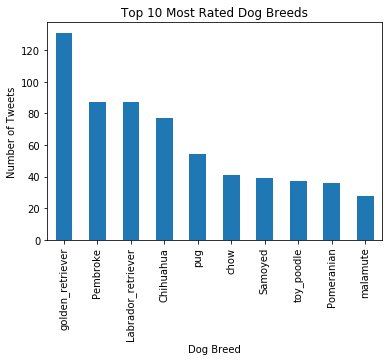

In [85]:
# Plot a bar chart showing the Top 10 Most Rated Dog Breeds
most_rated_breed.plot(kind='bar', legend=None);
plt.title('Top 10 Most Rated Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Tweets');

The most rated Dog Breed is the **Golden Retriever**

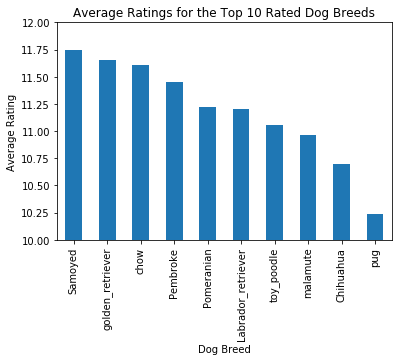

In [111]:
# Plot a bar chart showing the Average Ratings for the Top 10 Rated Dog Breeds
top_rated_breed.plot(kind='bar', legend=None);
plt.title('Average Ratings for the Top 10 Rated Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating')
plt.ylim(10, 12);

On average, the highest rated Dog Breed from the Top 10 rated dogs is the **Samoyed** breed

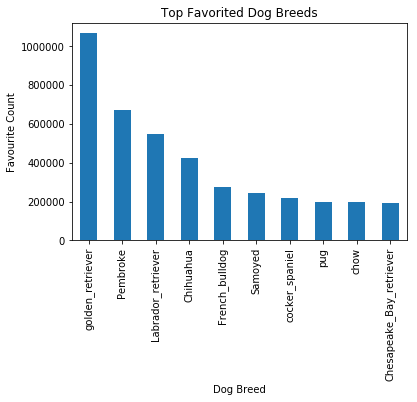

In [106]:
# Plot a bar chart showing the Average Ratings for the Top Favorited Dog Breeds
top_favorited_breed.plot(kind='bar', legend=None);
plt.title('Top Favorited Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Favourite Count');

The most favorited Dog Breed is the **Golden Retriever**

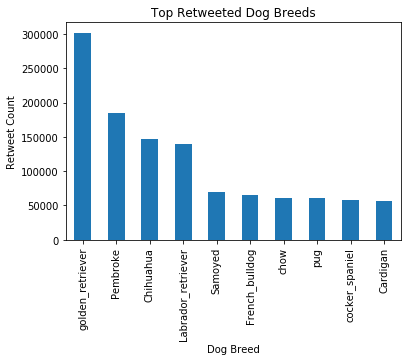

In [108]:
# Plot a bar chart showing the Top Retweeted Dog Breeds
top_retweeted_breed.plot(kind='bar', legend=None);
plt.title('Top Retweeted Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Count');

The most retweeted Dog Breed is the **Golden Retriever**

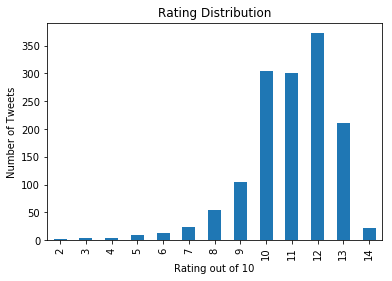

In [99]:
# Plot a bar chart showing the Rating Distribution over the entire data set
rating_distribution.plot(kind='bar', legend=None);
plt.title('Rating Distribution')
plt.xlabel('Rating out of 10')
plt.ylabel('Number of Tweets');

The most popular dog rating is **12/10**

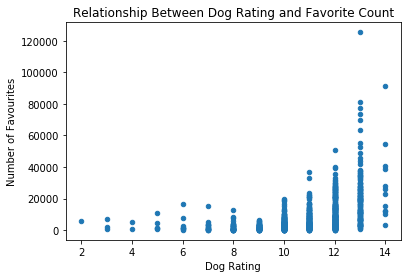

In [101]:
# Plot a bar chart showing the relationship between dog rating and favorite count
master_clean.plot(x="rating_numerator", y="favorite_count", kind="scatter");
plt.title("Relationship Between Dog Rating and Favorite Count")
plt.xlabel("Dog Rating")
plt.ylabel("Number of Favourites");

There is a **Positive Correlation** between a dog's rating and the number of times the tweet is favourited

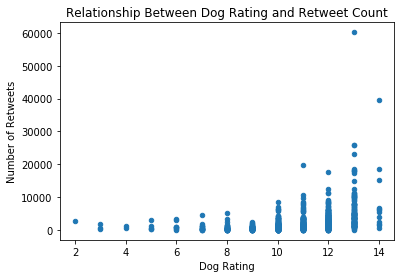

In [102]:
# Plot a bar chart showing the relationship between dog rating and retweet count
master_clean.plot(x="rating_numerator", y="retweet_count", kind="scatter");
plt.title("Relationship Between Dog Rating and Retweet Count")
plt.xlabel("Dog Rating")
plt.ylabel("Number of Retweets");

There is a **Positive Correlation** between a dog's rating and the number of times the tweet is retweeted

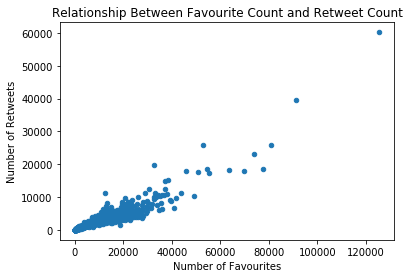

In [110]:
# Plot a bar chart showing the relationship between favorite count and retweet count
master_clean.plot(x="favorite_count", y="retweet_count", kind="scatter");
plt.title("Relationship Between Favourite Count and Retweet Count")
plt.xlabel("Number of Favourites")
plt.ylabel("Number of Retweets");

There is a **Positive Correlation** between the number of times a tweet is favourited and the number of times the tweet is retweeted

                    number_of_ratings  avg_rating
breed                                            
golden_retriever                  131   11.656489
Pembroke                           87   11.448276
Labrador_retriever                 87   11.206897
Chihuahua                          77   10.701299
pug                                54   10.240741
chow                               41   11.609756
Samoyed                            39   11.743590
toy_poodle                         37   11.054054
Pomeranian                         36   11.222222
malamute                           28   10.964286


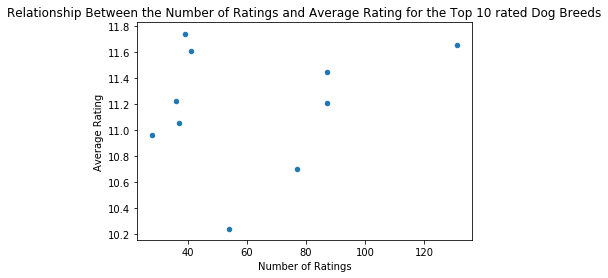

In [109]:
# Plot a bar chart showing the relationship between number of ratings and the average rating for top 10 most rated dog breeds
top_dog_rating = pd.merge(most_rated_breed, top_rated_breed, on='breed')
print(top_dog_rating)
top_dog_rating.plot(x="number_of_ratings", y="avg_rating", kind="scatter");
plt.title("Relationship Between the Number of Ratings and Average Rating for the Top 10 rated Dog Breeds")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating");

There is **no correlation** between the number of ratings a dog breed has to its average rating